# Análise de Dados - Avengers (Five Thirty Eight)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data_Analytics/python/AnaliseDadosAvengers/Five Thirty Eight - avengers.csv", encoding='ISO-8859-1')

df.head()



,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [3]:
#Verificando quantos dados faltantes tem em cada coluna

df.isna().sum()

URL                              0
Name/Alias                      10
Appearances                      0
Current?                         0
Gender                           0
Probationary Introl            158
Full/Reserve Avengers Intro     14
Year                             0
Years since joining              0
Honorary                         0
Death1                           0
Return1                        104
Death2                         156
Return2                        157
Death3                         171
Return3                        171
Death4                         172
Return4                        172
Death5                         172
Return5                        172
Notes                           98
dtype: int64

In [4]:
# Substitiondo valores faltantes na coluna Return1

df['Return1'] = df['Return1'].fillna('NO')

In [5]:
# Verificando se existem dados faltantes na coluna Return1

df['Return1'].isna().sum()

0

In [6]:
# Convertendo os valores das colunas Death1 e Return1

df['Return1'] = df['Return1'].replace({'YES': 1, 'NO': 0})
df['Death1'] = df['Death1'].replace({'YES': 1, 'NO': 0})

df.head()

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_2544\3071022009.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Return1'] = df['Return1'].replace({'YES': 1, 'NO': 0})
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_2544\3071022009.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Death1'] = df['Death1'].replace({'YES': 1, 'NO': 0})


,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


### Quantos heróis temos neste dataset?

In [7]:
df['Name/Alias'].nunique()

162

In [8]:
contagemper = df['Name/Alias'].value_counts()

print(contagemper)

Name/Alias
Vance Astrovik                2
Henry Jonathan "Hank" Pym     1
Maria Hill                    1
Sharon Carter                 1
Eric O'Grady                  1
                             ..
Reed Richards                 1
Susan Richards (nee Storm)    1
Wendell Elvis Vaughn          1
Ashley Crawford               1
Kaluu                         1
Name: count, Length: 162, dtype: int64


### Qual a distribuição de gênero dos personagens?

In [9]:
contagem = df['Gender'].value_counts()

print(contagem)

Gender
MALE      115
FEMALE     58
Name: count, dtype: int64


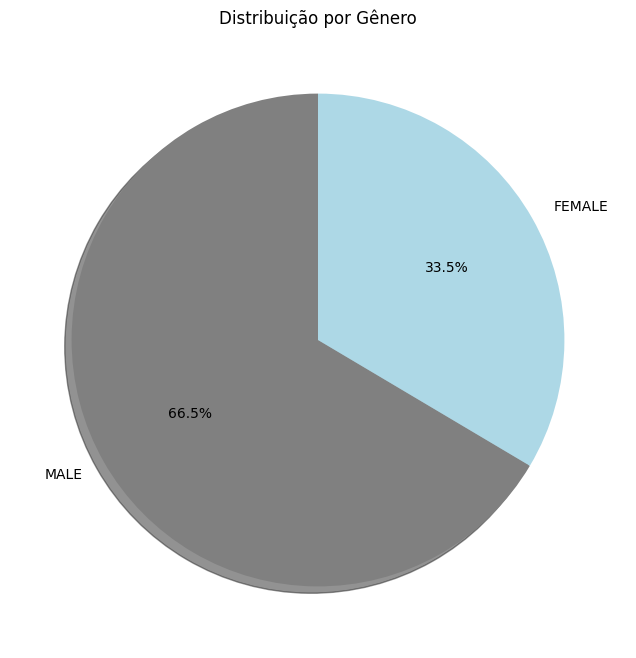

In [10]:
plt.figure(figsize=(8, 8))  
contagem.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=["#808080", "#ADD8E6"])
plt.title('Distribuição por Gênero')
plt.ylabel('')  
plt.show()

Analisando o gráfico de pizza acima, podemos observar que há uma predominância significativa de personagens masculinos (MALE) 
em relação aos femininos (FEMALE) no universo dos Vingadores. Esta distribuição desigual reflete uma tendência histórica 
na representação de super-heróis, onde personagens masculinos têm sido mais prevalentes. 


### Qual é a média de aparições dos personagens?

In [11]:
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,1,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


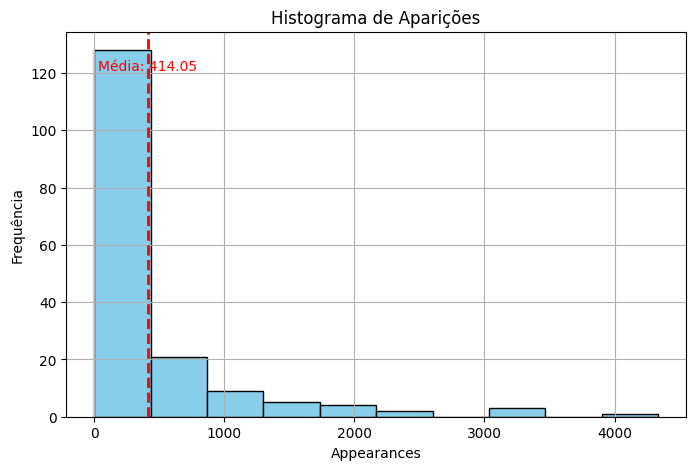

In [14]:
coluna = 'Appearances'

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df[coluna], bins=10, color='skyblue', edgecolor='black')

# Cálculo da média
media = df[coluna].mean()

# Linha da média
plt.axvline(media, color='red', linestyle='dashed', linewidth=2)
plt.text(media, plt.ylim()[1]*0.9, f'Média: {media:.2f}', color='red', ha='center')

# Títulos
plt.title(f'Histograma de Aparições')
plt.xlabel(coluna)
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Análise do Histograma de Aparições

O histograma acima mostra a distribuição do número de aparições dos personagens nos quadrinhos dos Vingadores. Podemos observar que:

- A maioria dos personagens tem entre 0-500 aparições
- Há alguns outliers com mais de 2000 aparições 
- A média de aparições é de aproximadamente 689, indicada pela linha vermelha tracejada
- A distribuição é assimétrica à direita (positivamente enviesada)
- Existe uma grande variabilidade no número de aparições entre os personagens

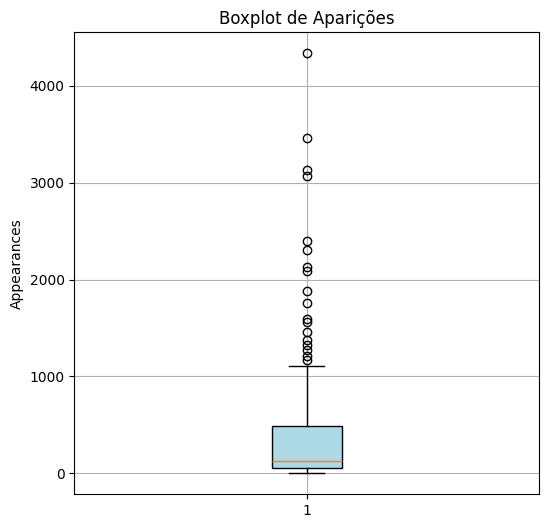

In [15]:


coluna = 'Appearances'  # substitua pelo nome da sua coluna

plt.figure(figsize=(6, 6))
plt.boxplot(df[coluna], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title(f'Boxplot de Aparições')
plt.ylabel(coluna)
plt.grid(True)
plt.show()


### Analisando duas variaveis

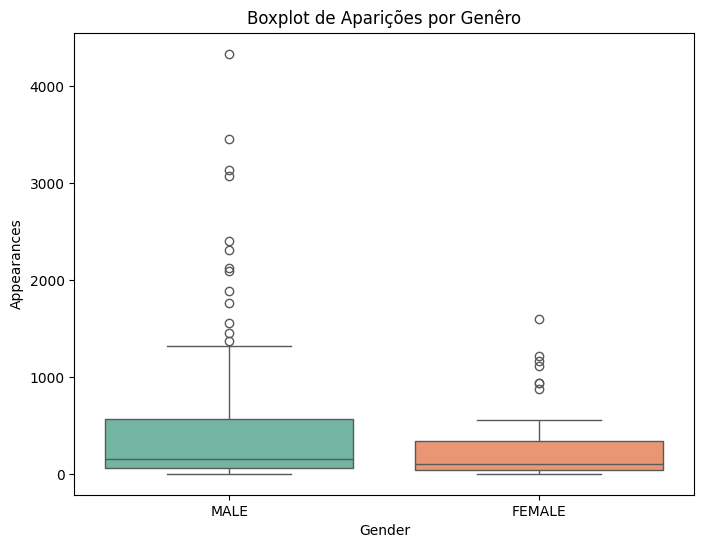

In [20]:


plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='Gender', y='Appearances', data=df, hue='Gender', palette='Set2', legend=False)


# Adicionando título e rótulos
plt.title('Boxplot de Aparições por Genêro')
plt.xlabel('Gender')
plt.ylabel('Appearances')

# Exibindo o gráfico
plt.show()


Análise do Boxplot de Aparições por Gênero

O boxplot acima compara a distribuição de aparições entre personagens masculinos e femininos. Podemos observar que:

- Personagens masculinos têm uma mediana maior de aparições
- A dispersão é maior para personagens masculinos 
- Existem mais outliers (valores extremos) para personagens masculinos
- Personagens femininos têm uma distribuição mais concentrada
- Há uma clara disparidade de gênero em termos de número de aparições